# Introducing k-Means

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

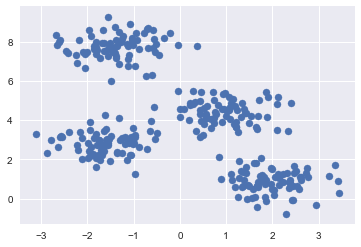

In [49]:
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50)

In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 1, 3, 1, 2, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 3, 3, 2, 0, 0, 2, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 3, 0, 3, 3,
       0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 3, 1, 0, 0, 0,
       1, 2, 1, 0, 3, 0, 1, 0, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 3, 2, 3,
       1, 1, 3, 2, 1, 0, 0, 3, 2, 2, 3, 0, 1, 2, 1, 2, 3, 2, 2, 3, 1, 3,
       0, 0, 2, 1, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 1, 3, 1, 1, 0, 3, 0, 3, 0, 1, 3, 1, 1, 1, 3, 1, 3,
       2, 0, 1, 0, 2, 3, 1, 3, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 3, 0, 1,
       2, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 2, 1, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 1, 3, 0, 2, 0, 3, 1, 0, 1, 3, 1, 3, 0, 3, 3, 1, 0, 0, 2, 2, 3,
       1, 2, 2, 0, 2, 0, 3, 1, 1, 3, 3, 1, 3, 2, 0, 3, 2, 0, 1, 0, 2, 3,
       2, 1, 1, 1, 1, 0, 0, 1, 3, 0, 2, 3, 0, 0, 0, 2, 2, 1, 3, 3, 0, 2,
       1, 0, 3, 1, 3, 2, 2, 0, 0, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2,
       1, 0, 1, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 0])

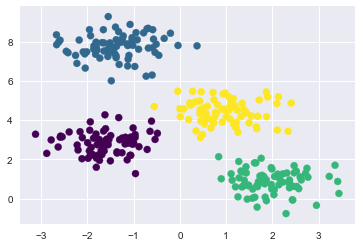

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

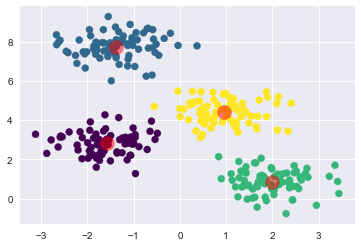

In [52]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

# k-Means Algorithm: Expectation-Maximization

## Expectation-Maximization

Text(0.98,0.98,'Final Clustering')

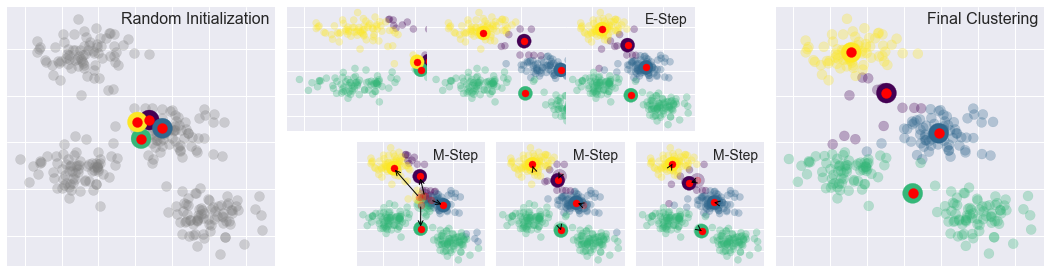

In [53]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.rand(4, 2)

def draw_points(ax, c, factor = 1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis', s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1], c=np.arange(4), cmap='viridis', 
               s=200*factor, alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=50 * factor, alpha=alpha)
    
def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs  = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)

ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, 'Random Initialization', transform=ax0.transAxes, ha='right', va='top', size=16)

draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)


for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 + i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i], arrowprops=dict(arrowstyle='->', linewidth=1))
        
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, 'E-Step', transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, 'M-Step', transform=ax2.transAxes, ha='right', va='top', size=14)
    
# Final E-step
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, 'Final Clustering', transform=axf.transAxes, ha='right', va='top', size=16)

## Basic Implementation

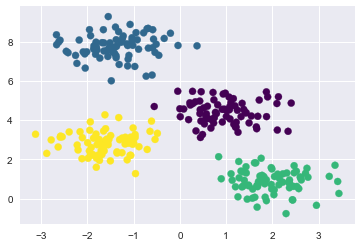

In [54]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers, axis=1)
        
        # 2b. Find new clusters from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
            
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

- https://blog.csdn.net/tong_xin2010/article/details/79846169

## Caveats of expectation-maximization

### The globally optimal result may not be achieved

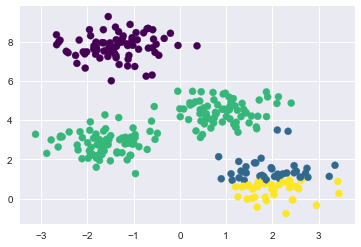

In [55]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

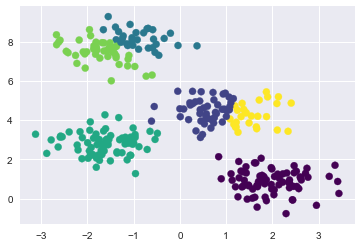

In [56]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

### k-means is limited to linear cluster boundaries

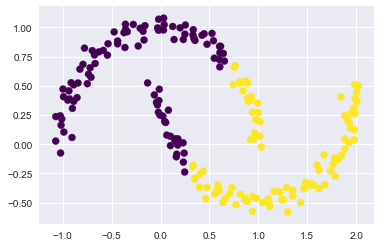

In [57]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

C:\Users\JT\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


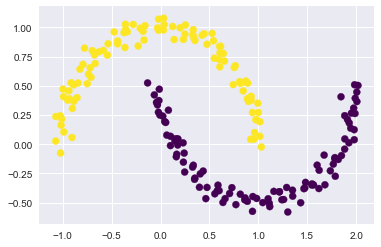

In [58]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

### k-means can be slow for large numbers of sampels

# Examples

# Example 1: k-means on digits

In [59]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [60]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

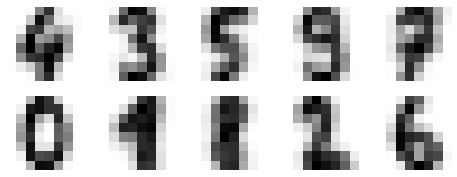

In [61]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [62]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
labels

array([0, 8, 8, ..., 8, 9, 9])

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Text(92.68,0.5,'predicted label')

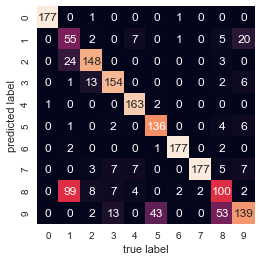

In [64]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = digits.target_names,
            yticklabels = digits.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

In [65]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)

for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
# Compute the accuracy
accuracy_score(digits.target, labels)

0.9326655537006121

## Example 2: k-means for color compression

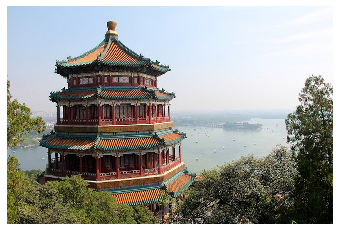

In [67]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

In [68]:
china.shape

(427, 640, 3)

In [70]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

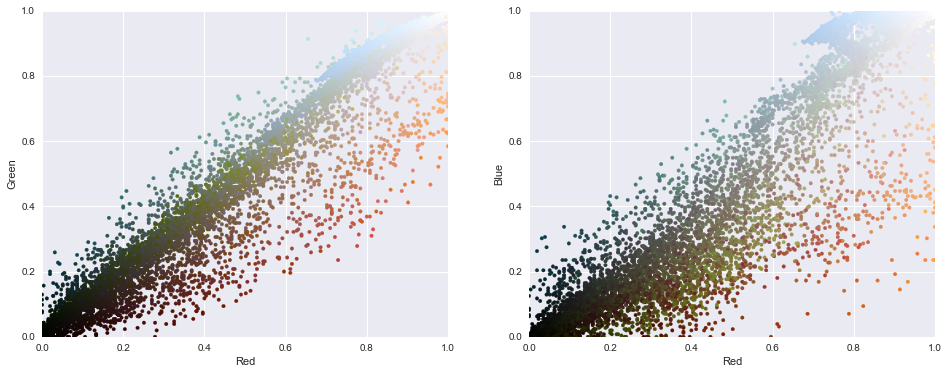

In [76]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fix, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20)
    
plot_pixels(data, title='Input color space: 16 million possible colors')

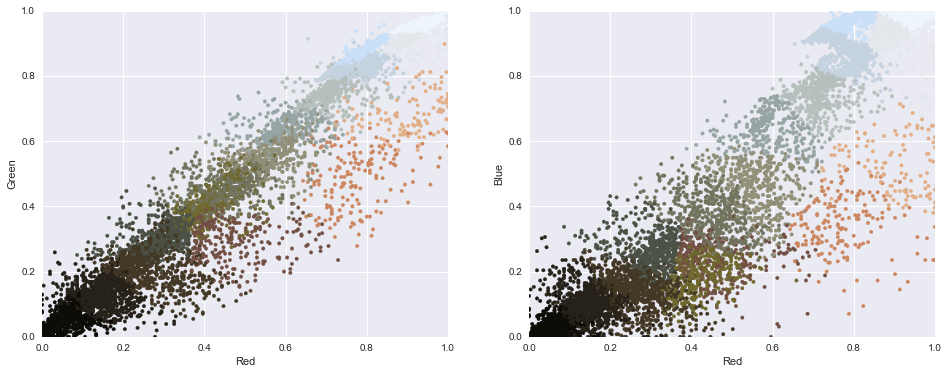

In [80]:
# import warnings; warnings.simplefilter('ignore')  # Fix Numpy issues

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced color space: 16 colors')

In [84]:
len(data), len(new_colors)

(273280, 273280)

Text(0.5,1,'16-color Image')

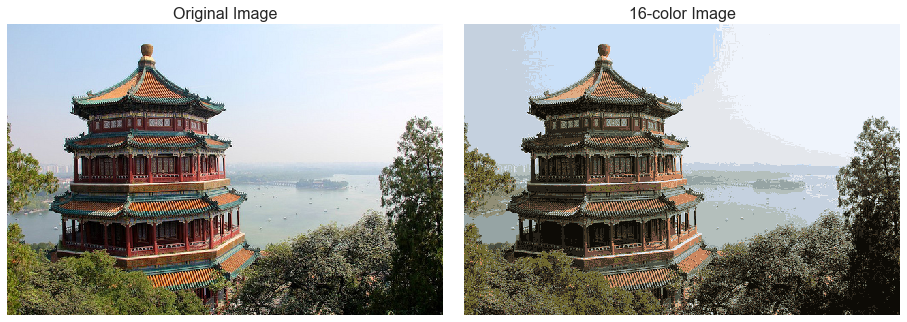

In [88]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), 
                       subplot_kw = dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

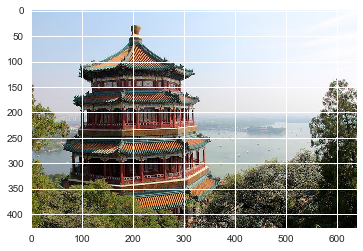

In [121]:
plt.imshow(china)
plt.savefig('china.png')

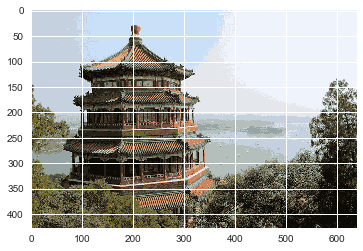

In [122]:
plt.imshow(china_recolored)
plt.savefig('china_recolored.png')

In [127]:
import os
os.path.getsize('china.png'), os.path.getsize('china_recolored.png'), os.path.getsize('china.png') / os.path.getsize('china_recolored.png'), 

(159419, 59392, 2.6841830549568964)